<a href="https://colab.research.google.com/github/Dezarti/datos_monografia/blob/main/An%C3%A1lisis_de_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Contenido

El dataset está compuesto de varios archivos, algunos de estos son de texto, otros son imágenes en diferentes formatos y algunos son desconocidos.



# **PROPUESTA DE METODOLOGÍA DE TRABAJO**

Es solo una propuesta, cualesquier mejora que creas conveniente, la puedes incluir.

- Revisar que todos los datos estén en el tipo de datos correcto según su categoría (int, float, string)

- Convertir datos categoricos simples a numéricos (yes → 1, no → 0, NAN → 0)

- Según el data summary del archivo app_data.xlsx, definir momentaneamente qué columnas son importantes para nosotros.

- De esas columnas revisar cuantos datos perdidos tienen. Con base en esta info determinar cuales columnas debemos descartar o si descartamos registros.

- Eliminar todos los registros de pacientes que no tengamos imágenes de ultrasonido.

- Homogenizar los datos, es decir, revisar que las entradas estén correctas de las columnas, que no hayan typos y que todo esté en orden.

- Empezar con la estadística descriptiva, más o menos como había iniciado abajo, viendo los tipos de distribuciones por histogramas o en 2D para variables de interes, etc.

- Organizar en una tabla valores estadísticos como promedio, desviación estandar, etc. (?)

- Ir pensando en cómo haremos para homogenizar los datos de las imágenes.

## Contenido archivo de texto




### **Pediatric Appendicitis Dataset**
This repository holds the data from a cohort of pediatric patients with suspected appendicitis admitted with abdominal pain to Children’s Hospital St. Hedwig in Regensburg, Germany, between 2016 and 2021.

Each patient has (potentially multiple) ultrasound (US) images, aka views, tabular data comprising laboratory, physical examination, scoring results and ultrasonographic findings extracted manually by the experts, and three target variables, namely, diagnosis, management and severity.

#### ***File Structure***
Below is a brief explanation of the file structure:
* `US_Pictures/`: folder with the original B-mode ultrasound images in BMP format; images are named as `<subject #>.<view #> *.bmp`
* `app_data.xlsx`: MS Excel file with tabular data (the '*Data Summary*' tab contains explanation of the variables); *corresponding subject numbers from the `US_Pictures/` folder can be found in the column `US_Number`*
* `multiple_in_one_`: a list of US image names containing multiple snapshots
* `test_set_codes_csv`: a list of data points from the test set

#### ***Naming Conventions ***
Following conventions are used for US image names:

| **Name** | **Meaning**               |
|----------|---------------------------|
| App      | Appendix                  |
| LN       | Lymph nodes               |
| RLQ      | Right lower quadrant      |
| FF       | Free fluids               |
| T        | Transversal               |
| L        | Longitudinal              |
| M        | Measure / Marker          |
| LAM      | Mesenterial lymphadenitis |

#### ***Further Reading & Maintainers***

Further information about the dataset can be found in the accompanying preprint and the code repository. In case of questions, please reach out to Patricia Reis Wolfertstetter ([patricia.reiswolfertstetter@barmherzige-regensburg.de](mailto:patricia.reiswolfertstetter@barmherzige-regensburg.de)) and Ričards Marcinkevičs ([ricards.marcinkevics@inf.ethz.ch](mailto:ricards.marcinkevics@inf.ethz.ch)).

#### ***Copyright***
This repository is copyright © 2023 Marcinkevičs, Reis Wolfertstetter, Klimiene, Ozkan, Chin-Cheong, Paschke, Zerres, Denzinger, Niederberger, Wellmann, Knorr and Vogt.

This repository is additionally licensed under CC-BY-NC-4.0.


## Datos Estructurados

Estos corresponden al archivo app_data.xlsx

In [ ]:
# Librerías

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [ ]:
# Ruta del archivo
file_path = 'https://raw.githubusercontent.com/Dezarti/datos_monografia/main/app_data.xlsx'

# Cargar la primera hoja del archivo Excel en un DataFrame
df = pd.read_excel(file_path, sheet_name=0)

# Mostrar las primeras filas del DataFrame
df.head()


,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Severity,Diagnosis_Presumptive,Diagnosis,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
0,12.68,16.9,female,148.0,37.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,14.10,31.9,male,147.0,69.5,2.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN
2,14.14,23.3,female,163.0,62.0,4.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,yes,NaN
3,16.37,20.6,female,165.0,56.0,3.0,conservative,uncomplicated,appendicitis,no appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN
4,11.08,16.9,female,163.0,45.0,3.0,conservative,uncomplicated,appendicitis,appendicitis,...,NaN,yes,reUB,NaN,NaN,NaN,NaN,NaN,yes,NaN


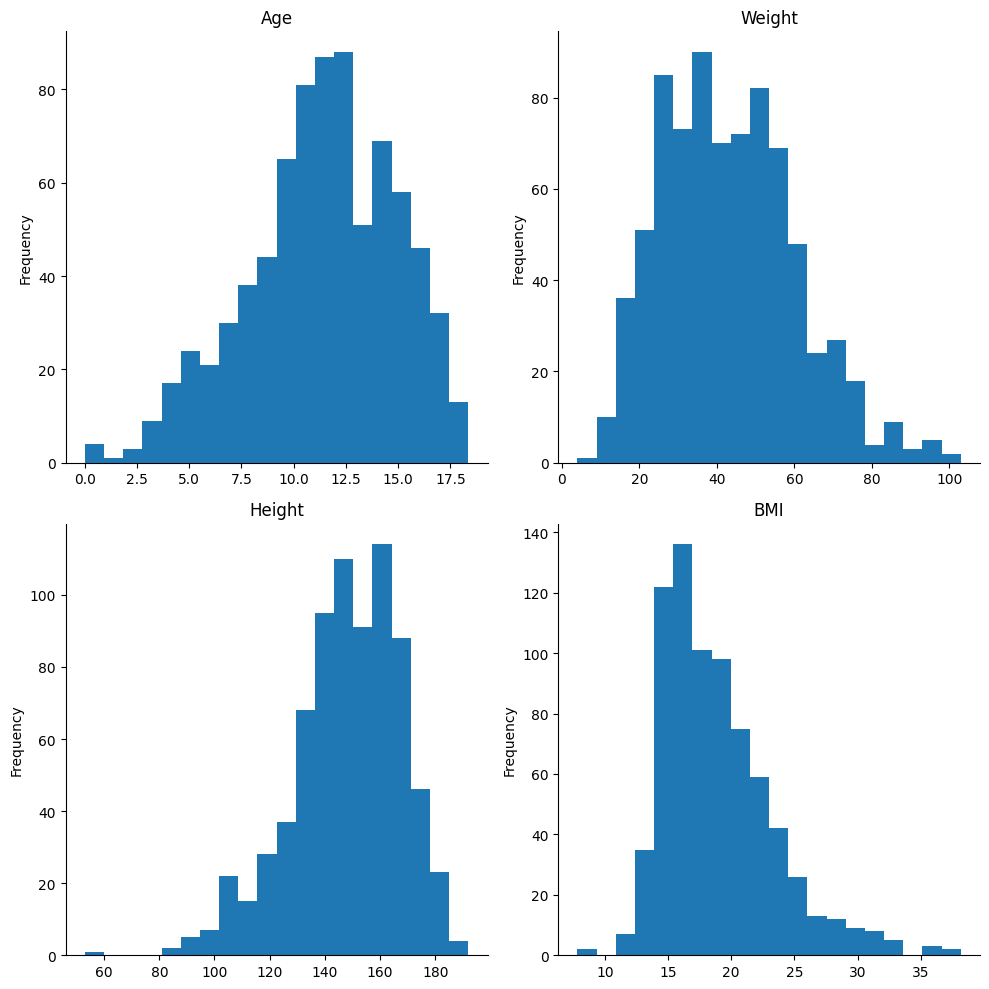

In [ ]:
# Distribuciones

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

df['Age'].plot(kind='hist', bins=20, ax=axs[0, 0], title='Age')
axs[0, 0].spines[['top', 'right']].set_visible(False)

df['Weight'].plot(kind='hist', bins=20, ax=axs[0, 1], title='Weight')
axs[0, 1].spines[['top', 'right']].set_visible(False)

df['Height'].plot(kind='hist', bins=20, ax=axs[1, 0], title='Height')
axs[1, 0].spines[['top', 'right']].set_visible(False)

df['BMI'].plot(kind='hist', bins=20, ax=axs[1, 1], title='BMI')
axs[1, 1].spines[['top', 'right']].set_visible(False)

plt.tight_layout()
plt.show()

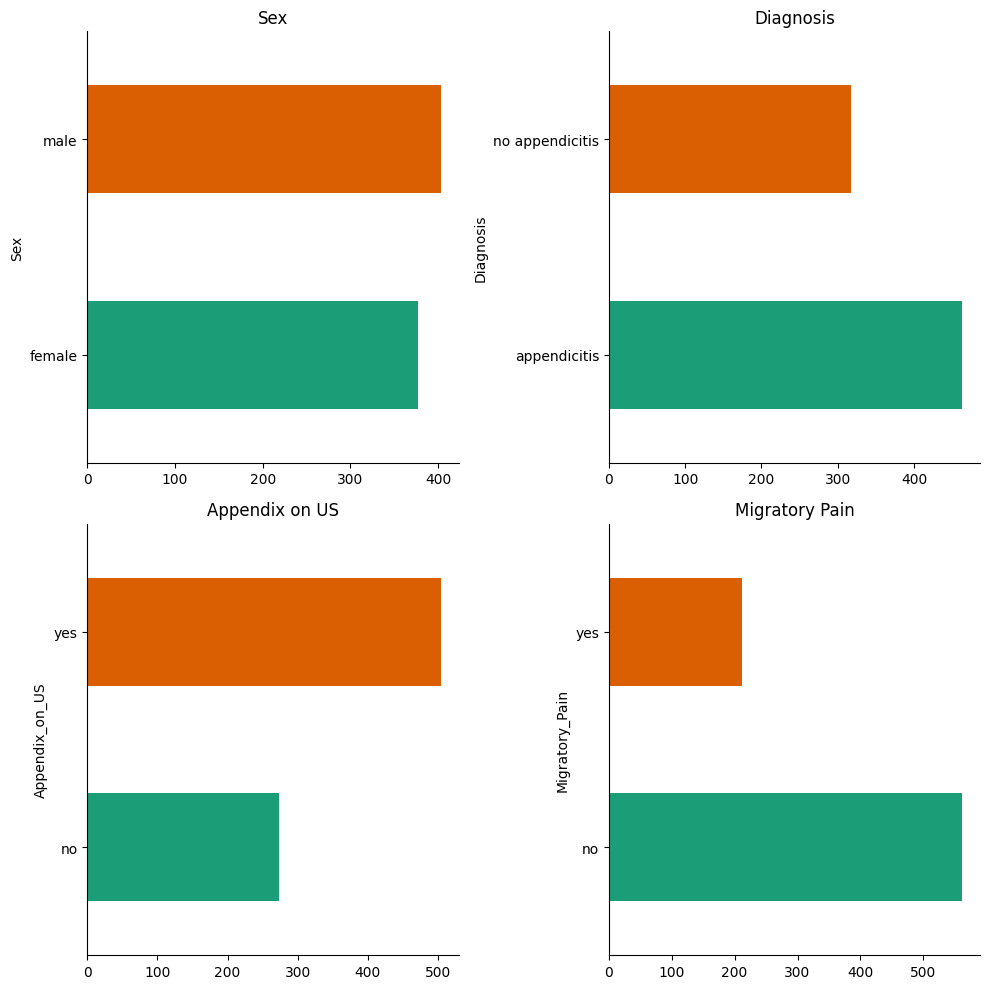

In [ ]:
# Variables Categoricas

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

df.groupby('Sex').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axs[0, 0])
axs[0, 0].spines[['top', 'right']].set_visible(False)
axs[0, 0].set_title('Sex')

df.groupby('Diagnosis').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axs[0, 1])
axs[0, 1].spines[['top', 'right']].set_visible(False)
axs[0, 1].set_title('Diagnosis')

df.groupby('Appendix_on_US').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axs[1, 0])
axs[1, 0].spines[['top', 'right']].set_visible(False)
axs[1, 0].set_title('Appendix on US')

df.groupby('Migratory_Pain').size().plot(kind='barh', color=sns.color_palette('Dark2'), ax=axs[1, 1])
axs[1, 1].spines[['top', 'right']].set_visible(False)
axs[1, 1].set_title('Migratory Pain')

plt.tight_layout()
plt.show()

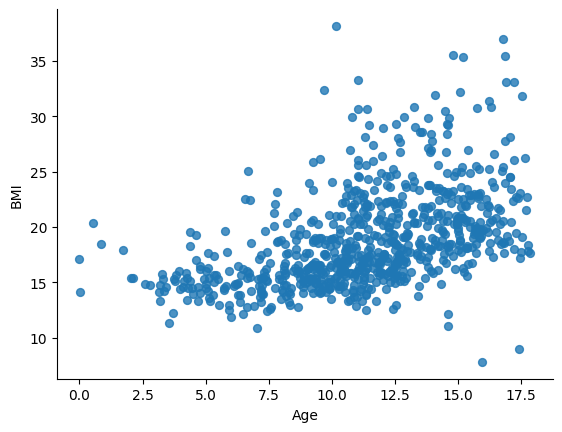

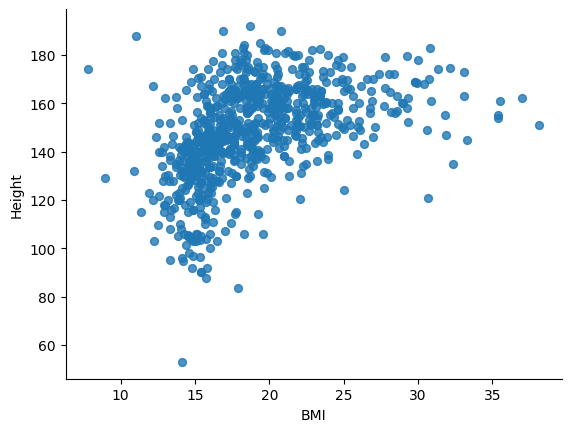

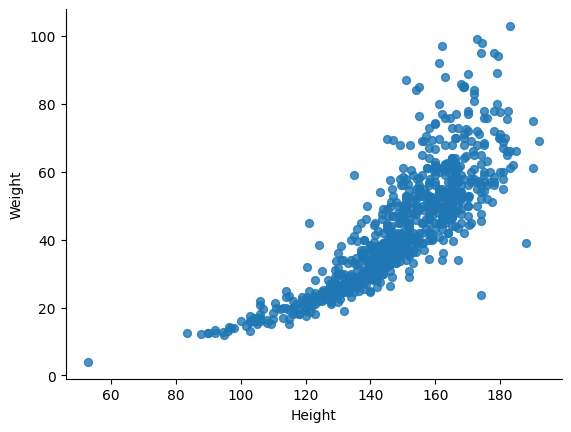

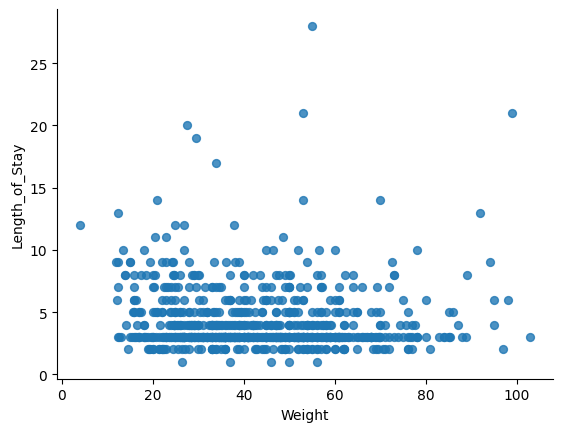

In [ ]:
# Distribuciones en 2D

df.plot(kind='scatter', x='Age', y='BMI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='BMI', y='Height', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Height', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

df.plot(kind='scatter', x='Weight', y='Length_of_Stay', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

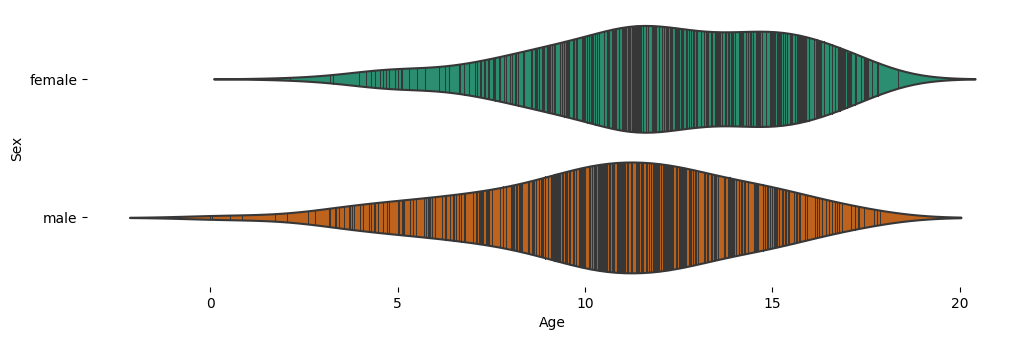

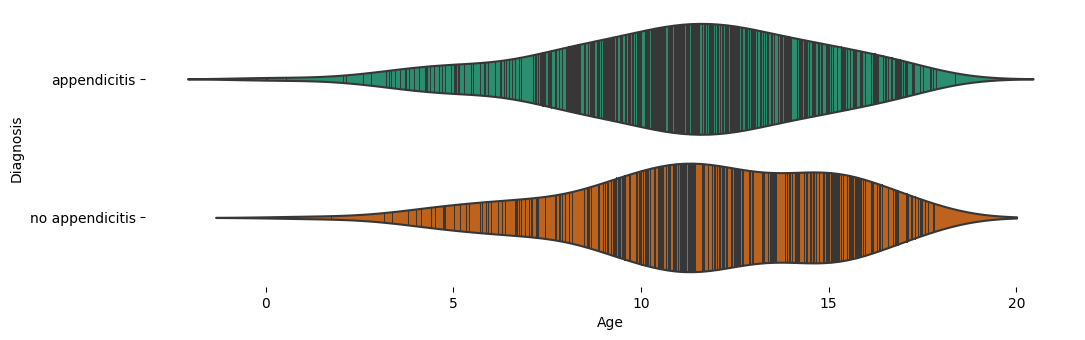

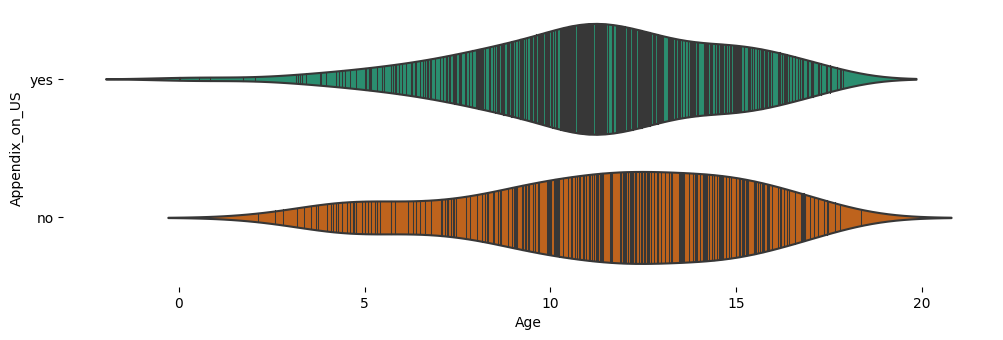

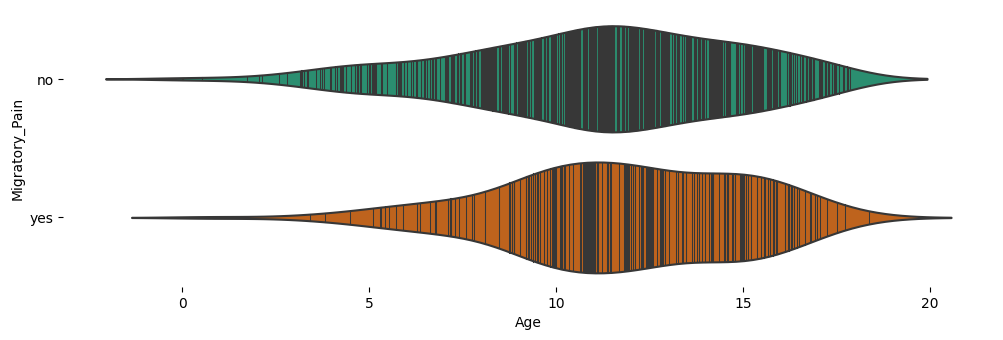

In [ ]:
# Distribuciones Facetadas

figsize = (12, 1.2 * len(df['Sex'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Sex', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

figsize = (12, 1.2 * len(df['Diagnosis'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Diagnosis', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

figsize = (12, 1.2 * len(df['Appendix_on_US'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Appendix_on_US', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

figsize = (12, 1.2 * len(df['Migratory_Pain'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='Age', y='Migratory_Pain', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)